<a href="https://colab.research.google.com/github/Maria-Paula05/Laboratorio-Procesamiento-Digital-de-Se-ales/blob/main/TP1/Laboratorio%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Laboratorio 1 - Análisis estadístico de la señal**#



# Introducción

Las señales biomédicas nos muestran la actividad fisiológica del cuerpo que a su vez contienen información clave, como su amplitud y frecuencia. Sin embargo, al ser capturada en entornos reales, suelen estar acompañadas de ruido, lo que puede afectar su análisis e interpretación.

Para el análisis de estas señales, además de examinar sus variaciones en el tiempo y la frecuencia, es útil calcular ciertos parámetros estadísticos que nos permiten describir su comportamiento y detectar patrones relevantes.

In [ ]:
!pip install wfdb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.3/162.3 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 85.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import wfdb  # Librería para leer archivos PhysioNet
from scipy.stats import variation

# 1. Cargar señal desde archivos .dat y .hea

In [ ]:
record = wfdb.rdrecord("rec_1")
signal = record.p_signal[:, 0]  # Tomar la primera señal
fs = record.fs  # Frecuencia de muestreo

# 2. Graficar la señal

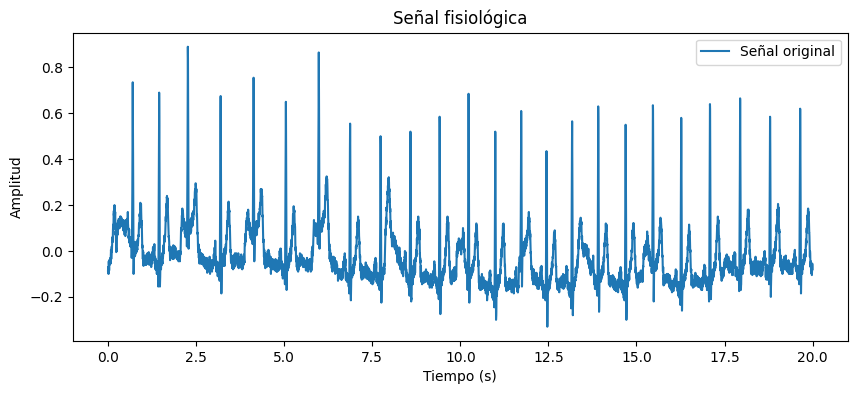

In [ ]:
time = np.arange(len(signal)) / fs
plt.figure(figsize=(10, 4))
plt.plot(time, signal, label="Señal original")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Señal fisiológica")
plt.legend()
plt.show()

# 3. Cálculo de estadísticas descriptivas

In [ ]:
mean_signal = np.mean(signal)
std_signal = np.std(signal)
cv_signal = variation(signal)

print(f"Media de la señal: {mean_signal:.4f}")
print(f"Desviación estándar: {std_signal:.4f}")
print(f"Coeficiente de variación: {cv_signal:.4f}")

Media de la señal: -0.0240
Desviación estándar: 0.1294
Coeficiente de variación: -5.3892


# Histograma

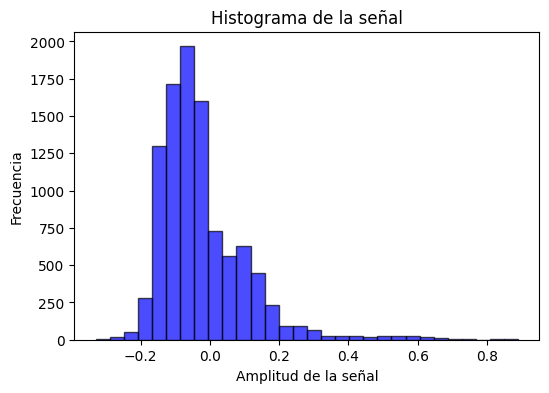

In [ ]:
plt.figure(figsize=(6, 4))
plt.hist(signal, bins=30, alpha=0.7, color='b', edgecolor='black')
plt.xlabel("Amplitud de la señal")
plt.ylabel("Frecuencia")
plt.title("Histograma de la señal")
plt.show()

Media de la señal: -0.0240
Desviación estándar de la señal: 0.1294
Coeficiente de variación de la señal: -5.3892


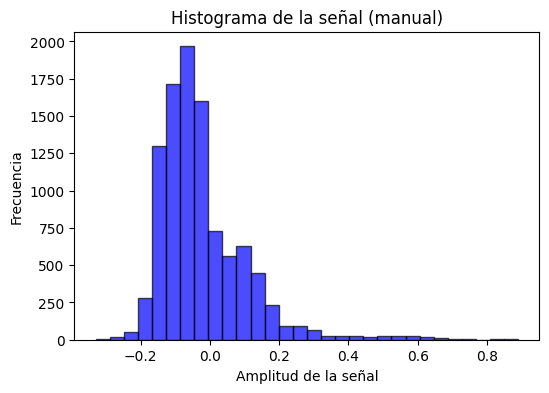

In [ ]:
# Media
n = len(signal)
suma_signal = np.sum(signal)
mean_signal = suma_signal / n
print(f"Media de la señal: {mean_signal:.4f}")

# Desviación estándar
sumatoria_varianza = np.sum((signal - mean_signal) ** 2)
std_signal = np.sqrt(sumatoria_varianza / n)
print(f"Desviación estándar de la señal: {std_signal:.4f}")

# Coeficiente de variación
cv_signal = std_signal / mean_signal
print(f"Coeficiente de variación de la señal: {cv_signal:.4f}")

# Histograma
bins = 30
min_val, max_val = np.min(signal), np.max(signal)
bin_width = (max_val - min_val) / bins
frecuencias = np.zeros(bins)

for value in signal:
    bin_index = int((value - min_val) / bin_width)
    if bin_index == bins:  # Asegurarse de que los valores en el límite superior caigan en el último bin
        bin_index -= 1
    frecuencias[bin_index] += 1

bordes_bin = np.linspace(min_val, max_val, bins + 1)
centros_bin = (bordes_bin[:-1] + bordes_bin[1:]) / 2

# Graficar histograma
plt.figure(figsize=(6, 4))
plt.bar(centros_bin, frecuencias, width=bin_width, alpha=0.7, color='b', edgecolor='black')
plt.xlabel("Amplitud de la señal")
plt.ylabel("Frecuencia")
plt.title("Histograma de la señal (manual)")
plt.show()

# Función de probabilidad


# Señal contaminada con ruido gaussiano

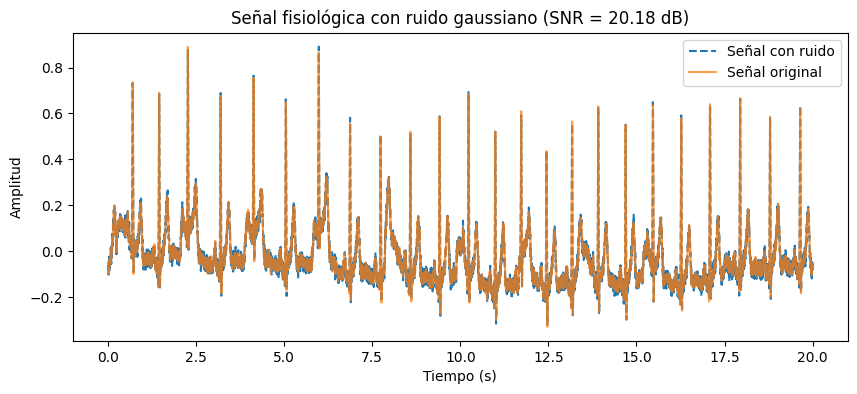

SNR: 20.18 dB


In [ ]:
noise_std = 0.1 * np.std(signal)  # Ajusta la desviación estándar del ruido
noise = np.random.normal(0, noise_std, size=len(signal))  # Ruido gaussiano

noisy_signal = signal + noise  # Contaminación con ruido

# Calcular la SNR en dB
signal_power = np.mean(signal ** 2)
noise_power = np.mean(noise ** 2)
snr_db = 10 * np.log10(signal_power / noise_power)

# Graficar la señal original y la señal con ruido
time = np.arange(len(signal)) / fs
plt.figure(figsize=(10, 4))
plt.plot(time, noisy_signal, label="Señal con ruido", linestyle="dashed")
plt.plot(time, signal, label="Señal original", alpha=0.75)
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title(f"Señal fisiológica con ruido gaussiano (SNR = {snr_db:.2f} dB)")
plt.legend()
plt.show()

# Imprimir la SNR
print(f"SNR: {snr_db:.2f} dB")


# Señal contaminada con ruido gaussiano amplificado

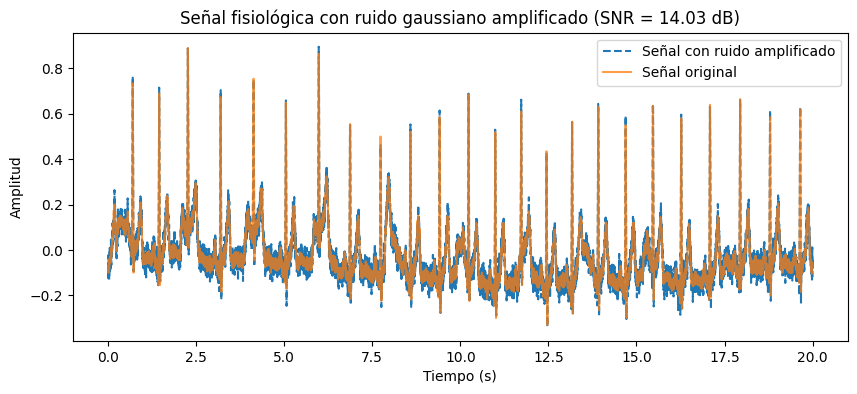

SNR: 14.03 dB


In [ ]:
noise_std = 0.1 * np.std(signal)  # Ajusta la desviación estándar del ruido
noise = 2 * (np.random.normal(0, noise_std, size=len(signal)))  # Ruido gaussiano

noisy_signal = signal + noise  # Contaminación con ruido amplificado

# Calcular la SNR en dB
signal_power = np.mean(signal ** 2)
noise_power = np.mean(noise ** 2)
snr_db = 10 * np.log10(signal_power / noise_power)

# Graficar la señal original y la señal con ruido
time = np.arange(len(signal)) / fs
plt.figure(figsize=(10, 4))
plt.plot(time, noisy_signal, label="Señal con ruido amplificado", linestyle="dashed")
plt.plot(time, signal, label="Señal original", alpha=0.75)
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title(f"Señal fisiológica con ruido gaussiano amplificado (SNR = {snr_db:.2f} dB)")
plt.legend()
plt.show()

# Imprimir la SNR
print(f"SNR: {snr_db:.2f} dB")


# Señal contaminada con ruido impulso


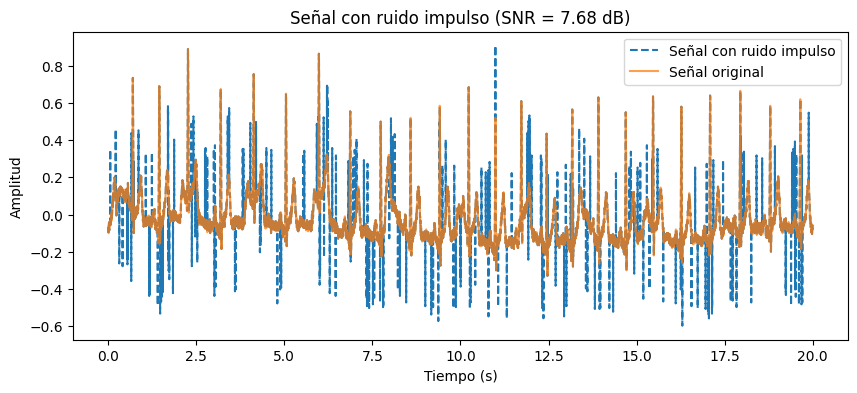

SNR: 7.68 dB


In [ ]:
# Parámetros del ruido impulso
impulse_prob = 0.02  # Probabilidad de que un punto sea un impulso
impulse_magnitude = 3 * np.std(signal)  # Amplitud de los impulsos

# Generar ruido impulso
impulse_noise = np.zeros_like(signal)
impulse_indices = np.random.rand(len(signal)) < impulse_prob  # Seleccionar posiciones de impulsos
impulse_noise[impulse_indices] = np.random.choice([-impulse_magnitude, impulse_magnitude], size=np.sum(impulse_indices))

# Contaminar la señal con el ruido impulso
noisy_signal = signal + impulse_noise

# Calcular la SNR en dB
signal_power = np.mean(signal ** 2)
noise_power = np.mean(impulse_noise ** 2)
snr_db = 10 * np.log10(signal_power / noise_power)

# Graficar la señal original y la señal con ruido impulso
time = np.arange(len(signal)) / fs
plt.figure(figsize=(10, 4))
plt.plot(time, noisy_signal, label="Señal con ruido impulso", linestyle="dashed")
plt.plot(time, signal, label="Señal original", alpha=0.75)
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title(f"Señal con ruido impulso (SNR = {snr_db:.2f} dB)")
plt.legend()
plt.show()

# Imprimir la SNR
print(f"SNR: {snr_db:.2f} dB")

# Señal contaminada con ruido impulso amplificado


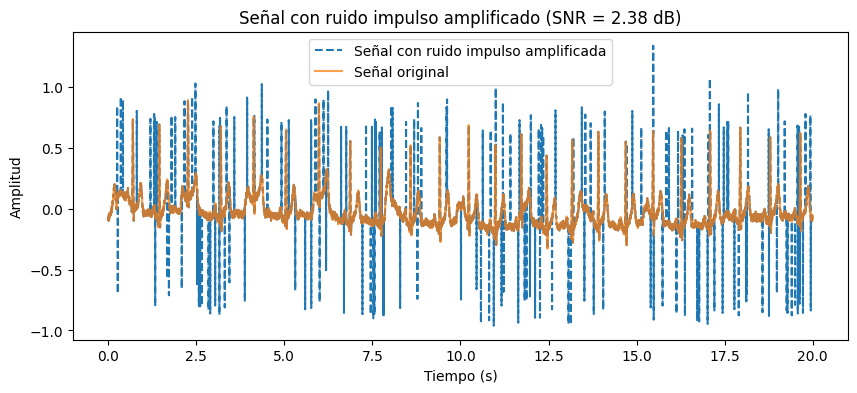

SNR: 2.38 dB


In [ ]:
# Parámetros del ruido impulso
impulse_prob = 0.02  # Probabilidad de que un punto sea un impulso
impulse_magnitude = 2 * (3 * np.std(signal))  # Amplitud de los impulsos

# Generar ruido impulso
impulse_noise = np.zeros_like(signal)
impulse_indices = np.random.rand(len(signal)) < impulse_prob  # Seleccionar posiciones de impulsos
impulse_noise[impulse_indices] = np.random.choice([-impulse_magnitude, impulse_magnitude], size=np.sum(impulse_indices))

# Contaminar la señal con el ruido impulso
noisy_signal = signal + impulse_noise

# Calcular la SNR en dB
signal_power = np.mean(signal ** 2)
noise_power = np.mean(impulse_noise ** 2)
snr_db = 10 * np.log10(signal_power / noise_power)

# Graficar la señal original y la señal con ruido impulso
time = np.arange(len(signal)) / fs
plt.figure(figsize=(10, 4))
plt.plot(time, noisy_signal, label="Señal con ruido impulso amplificada", linestyle="dashed")
plt.plot(time, signal, label="Señal original", alpha=0.75)
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title(f"Señal con ruido impulso amplificado (SNR = {snr_db:.2f} dB)")
plt.legend()
plt.show()

# Imprimir la SNR
print(f"SNR: {snr_db:.2f} dB")

# Señal contaminada con ruido tipo artefacto

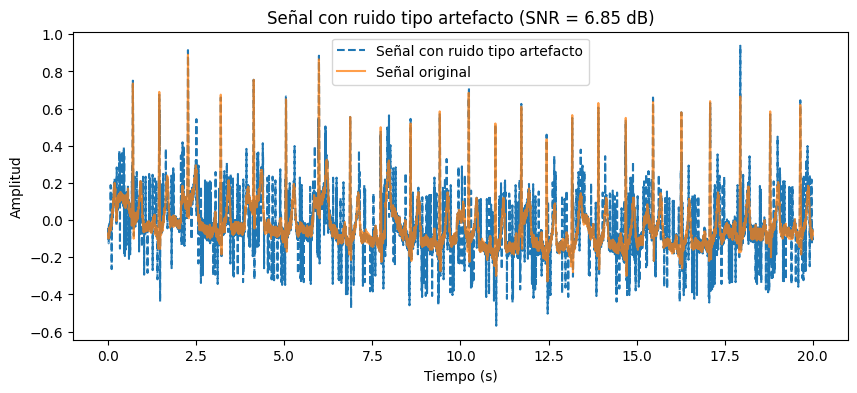

SNR: 6.85 dB


In [ ]:
# Parámetros del ruido tipo artefacto
powerline_freq = 50  # Frecuencia de interferencia de línea eléctrica (puede ser 60 Hz en algunos países)
artifact_prob = 0.05  # Probabilidad de aparición de artefactos transitorios
artifact_magnitude = 2 * np.std(signal)  # Magnitud de los artefactos

# Generar interferencia de línea eléctrica (senoidal)
time = np.arange(len(signal)) / fs
powerline_noise = 0.2 * np.std(signal) * np.sin(2 * np.pi * powerline_freq * time)

# Generar artefactos transitorios en posiciones aleatorias
artifact_noise = np.zeros_like(signal)
artifact_indices = np.random.rand(len(signal)) < artifact_prob
artifact_noise[artifact_indices] = np.random.choice([-artifact_magnitude, artifact_magnitude], size=np.sum(artifact_indices))

# Ruido total = interferencia de línea + artefactos
total_noise = powerline_noise + artifact_noise

# Contaminar la señal con el ruido tipo artefacto
noisy_signal = signal + total_noise

# Calcular la SNR en dB
signal_power = np.mean(signal ** 2)
noise_power = np.mean(total_noise ** 2)
snr_db = 10 * np.log10(signal_power / noise_power)

# Graficar la señal original y la señal contaminada
plt.figure(figsize=(10, 4))
plt.plot(time, noisy_signal, label="Señal con ruido tipo artefacto", linestyle="dashed")
plt.plot(time, signal, label="Señal original", alpha=0.75)
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title(f"Señal con ruido tipo artefacto (SNR = {snr_db:.2f} dB)")
plt.legend()
plt.show()

# Imprimir la SNR
print(f"SNR: {snr_db:.2f} dB")

# Señal con ruido tipo artefacto amplificada

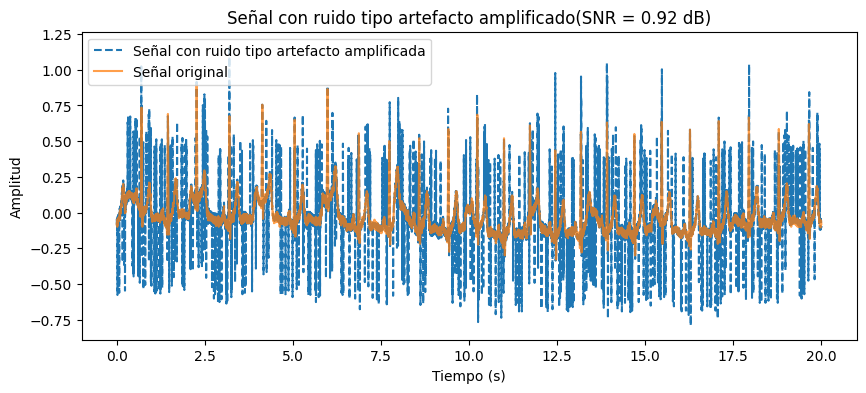

SNR: 0.92 dB


In [ ]:
# Parámetros del ruido tipo artefacto
powerline_freq = 50  # Frecuencia de interferencia de línea eléctrica (puede ser 60 Hz en algunos países)
artifact_prob = 0.05  # Probabilidad de aparición de artefactos transitorios
artifact_magnitude = 2 * (2 * np.std(signal))  # Magnitud de los artefactos

# Generar interferencia de línea eléctrica (senoidal)
time = np.arange(len(signal)) / fs
powerline_noise = 0.2 * np.std(signal) * np.sin(2 * np.pi * powerline_freq * time)

# Generar artefactos transitorios en posiciones aleatorias
artifact_noise = np.zeros_like(signal)
artifact_indices = np.random.rand(len(signal)) < artifact_prob
artifact_noise[artifact_indices] = np.random.choice([-artifact_magnitude, artifact_magnitude], size=np.sum(artifact_indices))

# Ruido total = interferencia de línea + artefactos
total_noise = powerline_noise + artifact_noise

# Contaminar la señal con el ruido tipo artefacto
noisy_signal = signal + total_noise

# Calcular la SNR en dB
signal_power = np.mean(signal ** 2)
noise_power = np.mean(total_noise ** 2)
snr_db = 10 * np.log10(signal_power / noise_power)

# Graficar la señal original y la señal contaminada
plt.figure(figsize=(10, 4))
plt.plot(time, noisy_signal, label="Señal con ruido tipo artefacto amplificada", linestyle="dashed")
plt.plot(time, signal, label="Señal original", alpha=0.75)
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title(f"Señal con ruido tipo artefacto amplificado(SNR = {snr_db:.2f} dB)")
plt.legend()
plt.show()

# Imprimir la SNR
print(f"SNR: {snr_db:.2f} dB")